In [29]:
library('ggplot2')
library('reshape2')

In [30]:
sig2s = c(2,5,10)
mus = c(1,5,20)
N = 100

In [31]:
Ns = rep(N,3)
Ns

[1] 100 100 100

In [32]:
g1 <- data.frame(group=1,x = rnorm(Ns[1],mus[1],sig2s[1]))
g2 <- data.frame(group=2,x = rnorm(Ns[2],mus[2],sig2s[2]))
g3 <- data.frame(group=3,x = rnorm(Ns[3],mus[3],sig2s[3]))
d = rbind(g1,g2,g3)
d$group <- as.factor(d$group)
d = d[sample(nrow(d)),]

In [33]:
head(d)

,group,x
,<fct>,<dbl>
271,3,28.182552
45,1,-2.477446
84,1,2.640120
174,2,9.970438
187,2,6.712303
285,3,32.889098


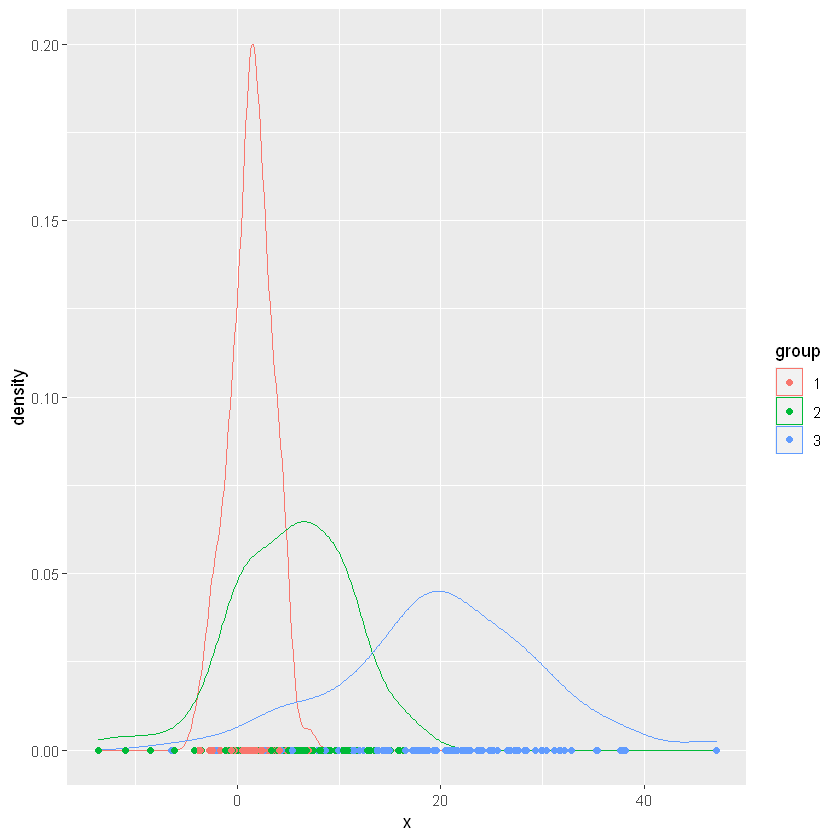

In [34]:
ggplot(data=d,mapping=aes(x=x,color=group,group=group))+
    geom_density()+
    geom_point(mapping=aes(x=x,y=0))

In [35]:
class=1
  
subd = d[d$group==class,]
head(subd)

,group,x
,<fct>,<dbl>
45,1,-2.4774463
84,1,2.6401200
65,1,5.0931900
27,1,1.0971629
18,1,-3.8062611
41,1,0.5265447


In [36]:
# mu1_hat
muhat = mean(subd$x)
muhat

[1] 1.379635

In [37]:
# pi_hat
pi_hat = mean(d$group==class)
pi_hat

[1] 0.3333333

In [38]:
var_hat = var(subd$x)
var_hat

[1] 4.425801

In [39]:
x0 = 1

In [40]:
dnorm(x0,mean=muhat,sd=sqrt(var_hat))*pi_hat

[1] 0.06219016

In [41]:
delta_qda_c = function(x0,class){
    subd = d[d$group==class,]
    muhat = mean(subd$x)
    pi_hat = mean(d$group==class)
    var_hat = var(subd$x)
    dlta = dnorm(x0,mean=muhat,sd=sqrt(var_hat))*pi_hat
    return(dlta)
}

In [42]:
qda_pred = function(x0){
    deltas = sapply(1:3,function(c)delta_qda_c(x0,c))
    return(which.max(deltas))
}

In [43]:
qda_pred(x0=1)

[1] 1

In [44]:
qda_pred(x0=7)

[1] 2

In [45]:
qda_pred(x0=20)

[1] 3

In [46]:
x_seq = seq(-10,25,length.out=500)

In [47]:
df = data.frame(x=x_seq,y_pred = sapply(x_seq,qda_pred))
df$y_pred = factor(df$y_pred)
df$c1 = sapply(x_seq,delta_qda_c,class=1)
df$c2 = sapply(x_seq,delta_qda_c,class=2)
df$c3 = sapply(x_seq,delta_qda_c,class=3)
head(df)

,x,y_pred,c1,c2,c3
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,-10.000000,2,2.800296e-08,0.0007036113,0.0001241489
2,-9.929860,2,3.351856e-08,0.0007264275,0.0001268846
3,-9.859719,2,4.007597e-08,0.0007498736,0.0001296739
4,-9.789579,2,4.786300e-08,0.0007739629,0.0001325179
5,-9.719439,2,5.709961e-08,0.0007987087,0.0001354174
6,-9.649299,2,6.804301e-08,0.0008241248,0.0001383732


In [48]:
mdf = melt(df,id.vars=c('x','y_pred'))
head(mdf)

,x,y_pred,variable,value
,<dbl>,<fct>,<fct>,<dbl>
1,-10.000000,2,c1,2.800296e-08
2,-9.929860,2,c1,3.351856e-08
3,-9.859719,2,c1,4.007597e-08
4,-9.789579,2,c1,4.786300e-08
5,-9.719439,2,c1,5.709961e-08
6,-9.649299,2,c1,6.804301e-08


In [49]:
levels(mdf$variable) = c(1,2,3)

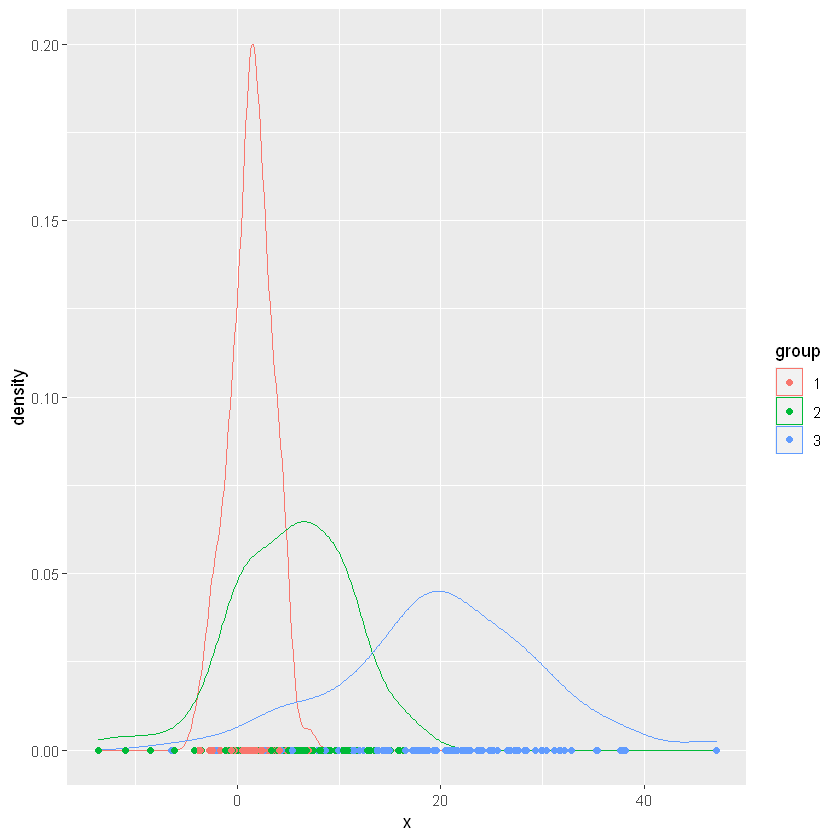

In [50]:
ggplot(data=d,mapping=aes(x=x,color=group,group=group))+
    geom_density()+
    geom_point(mapping=aes(x=x,y=0))

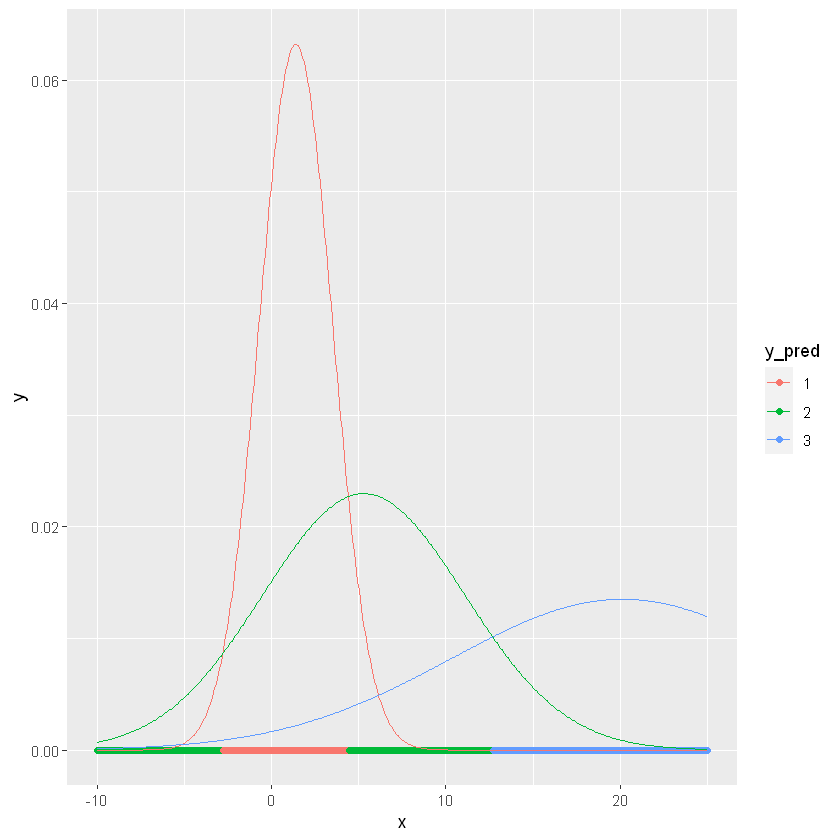

In [51]:
ggplot(data=mdf,mapping=aes(x=x,y=0,color=y_pred,group=y_pred))+
    geom_point()+
    geom_line(mapping=aes(x=x,y=value,group=variable,color=variable),inherit.aes=FALSE)

In [52]:
library('MASS')
?qda

qda {MASS},R Documentation
formula,"A formula of the form groups ~ x1 + x2 + ... That is, the response is the grouping factor and the right hand side specifies the (non-factor) discriminators."
data,"An optional data frame, list or environment from which variables specified in formula are preferentially to be taken."
x,(required if no formula is given as the principal argument.) a matrix or data frame or Matrix containing the explanatory variables.
grouping,(required if no formula principal argument is given.) a factor specifying the class for each observation.
prior,"the prior probabilities of class membership. If unspecified, the class proportions for the training set are used. If specified, the probabilities should be specified in the order of the factor levels."
subset,"An index vector specifying the cases to be used in the training sample. (NOTE: If given, this argument must be named.)"
na.action,"A function to specify the action to be taken if NAs are found. The default action is for the procedure to fail. An alternative is na.omit, which leads to rejection of cases with missing values on any required variable. (NOTE: If given, this argument must be named.)"
method,"""moment"" for standard estimators of the mean and variance, ""mle"" for MLEs, ""mve"" to use cov.mve, or ""t"" for robust estimates based on a t distribution."
CV,"If true, returns results (classes and posterior probabilities) for leave-out-out cross-validation. Note that if the prior is estimated, the proportions in the whole dataset are used."
nu,"degrees of freedom for method = ""t""."


In [53]:
my_preds = sapply(d$x,qda_pred)
my_preds

[1] 3 1 1 2 2 3 2 1 3 3 3 2 1 3 2 3 2 2 2 1 1 1 1 3 1 1 3 2 1 1 2 2 1 1 2 2 1
 [38] 1 1 1 2 1 3 2 2 3 1 3 2 1 3 2 3 1 1 1 1 2 3 1 2 1 1 3 1 3 1 1 1 1 3 2 3 2
 [75] 2 1 3 1 3 1 2 2 1 1 3 1 3 2 2 3 2 1 1 1 3 2 2 2 2 1 2 2 1 1 2 1 3 1 1 3 2
[112] 3 1 1 2 3 1 2 3 3 1 1 1 2 1 1 2 1 3 1 2 1 1 3 3 3 2 1 1 1 1 2 2 3 2 2 3 1
[149] 3 2 2 1 1 3 3 1 3 1 2 1 3 2 1 1 1 3 1 3 2 1 3 1 3 2 1 1 1 1 2 3 3 3 2 3 1
[186] 1 1 1 2 2 1 1 2 3 3 3 1 1 3 1 3 1 2 3 1 3 1 2 1 2 3 3 1 1 1 3 1 1 2 3 1 1
[223] 3 2 1 1 1 3 1 3 2 1 3 3 3 1 1 2 3 2 1 1 1 2 1 2 2 2 1 2 1 3 3 3 1 1 1 2 3
[260] 3 2 2 1 1 3 1 1 3 1 1 2 3 1 3 1 3 3 2 3 1 1 1 2 3 1 1 3 1 3 1 1 1 1 3 3 3
[297] 2 3 3 3

In [54]:
mod = qda(group~.,data=d)

In [55]:
mod

Call:
qda(group ~ ., data = d)

Prior probabilities of groups:
        1         2         3 
0.3333333 0.3333333 0.3333333 

Group means:
          x
1  1.379635
2  5.286875
3 20.147449

In [56]:
muhat

[1] 1.379635

In [57]:
pi_hat

[1] 0.3333333

In [58]:
mod_preds = predict(mod)$class
mod_preds

[1] 3 1 1 2 2 3 2 1 3 3 3 2 1 3 2 3 2 2 2 1 1 1 1 3 1 1 3 2 1 1 2 2 1 1 2 2 1
 [38] 1 1 1 2 1 3 2 2 3 1 3 2 1 3 2 3 1 1 1 1 2 3 1 2 1 1 3 1 3 1 1 1 1 3 2 3 2
 [75] 2 1 3 1 3 1 2 2 1 1 3 1 3 2 2 3 2 1 1 1 3 2 2 2 2 1 2 2 1 1 2 1 3 1 1 3 2
[112] 3 1 1 2 3 1 2 3 3 1 1 1 2 1 1 2 1 3 1 2 1 1 3 3 3 2 1 1 1 1 2 2 3 2 2 3 1
[149] 3 2 2 1 1 3 3 1 3 1 2 1 3 2 1 1 1 3 1 3 2 1 3 1 3 2 1 1 1 1 2 3 3 3 2 3 1
[186] 1 1 1 2 2 1 1 2 3 3 3 1 1 3 1 3 1 2 3 1 3 1 2 1 2 3 3 1 1 1 3 1 1 2 3 1 1
[223] 3 2 1 1 1 3 1 3 2 1 3 3 3 1 1 2 3 2 1 1 1 2 1 2 2 2 1 2 1 3 3 3 1 1 1 2 3
[260] 3 2 2 1 1 3 1 1 3 1 1 2 3 1 3 1 3 3 2 3 1 1 1 2 3 1 1 3 1 3 1 1 1 1 3 3 3
[297] 2 3 3 3
Levels: 1 2 3

In [59]:
all(mod_preds == my_preds)

[1] TRUE

In [60]:
head(predict(mod)$posterior)

,1,2,3
271,3.690418e-35,9.528297e-04,0.99904717
45,5.331479e-01,4.232485e-01,0.04360362
84,6.923996e-01,2.711845e-01,0.03641591
174,6.177094e-04,6.761361e-01,0.32324615
187,8.438505e-02,7.390701e-01,0.17654487
285,2.094134e-48,4.559848e-05,0.99995440


In [61]:
mod_df = cbind(x_seq,predict(mod,newdata=data.frame(x=x_seq))$posterior)
colnames(mod_df)[1] = c('x')
mod_df = data.frame(mod_df)
mmod_df = melt(mod_df,id.vars='x')
levels(mmod_df$variable) = 1:3
head(mmod_df)

,x,variable,value
,<dbl>,<fct>,<dbl>
1,-10.000000,1,3.382865e-05
2,-9.929860,1,3.927899e-05
3,-9.859719,1,4.556222e-05
4,-9.789579,1,5.279812e-05
5,-9.719439,1,6.112249e-05
6,-9.649299,1,7.068919e-05


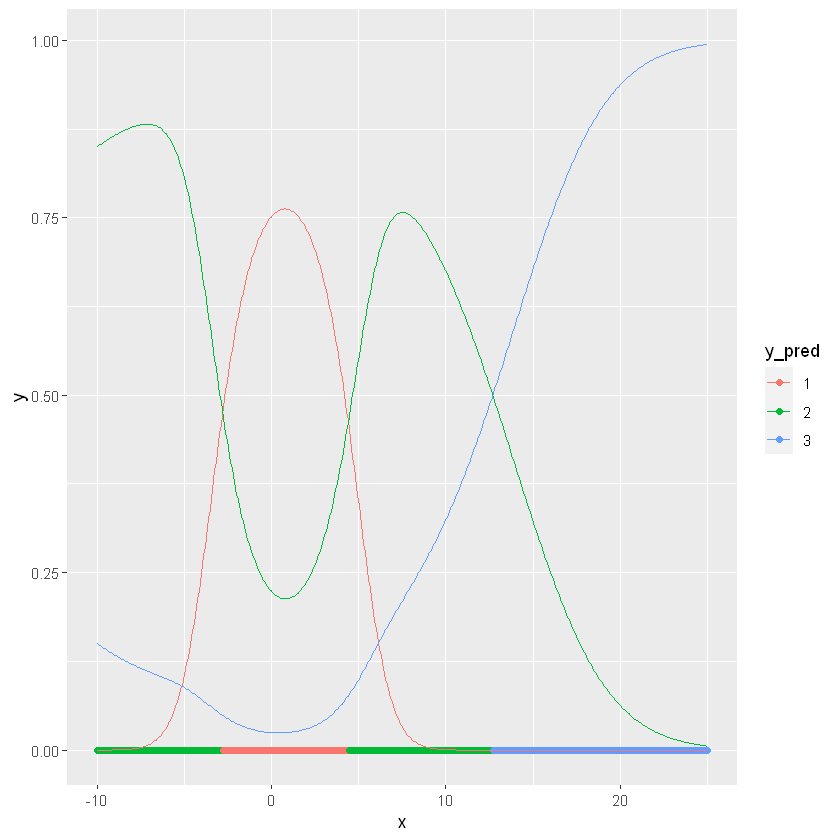

In [62]:
ggplot(data=mdf,mapping=aes(x=x,y=0,color=y_pred,group=y_pred))+
    geom_point()+
    #geom_line(mapping=aes(x=x,y=value,group=variable,color=variable),inherit.aes=FALSE)+
    geom_line(mapping=aes(x=x,y=value,group=variable,color=variable),inherit.aes=FALSE,data=mmod_df)

In [63]:
head(df)

,x,y_pred,c1,c2,c3
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,-10.000000,2,2.800296e-08,0.0007036113,0.0001241489
2,-9.929860,2,3.351856e-08,0.0007264275,0.0001268846
3,-9.859719,2,4.007597e-08,0.0007498736,0.0001296739
4,-9.789579,2,4.786300e-08,0.0007739629,0.0001325179
5,-9.719439,2,5.709961e-08,0.0007987087,0.0001354174
6,-9.649299,2,6.804301e-08,0.0008241248,0.0001383732


In [64]:
df[,3:5] = df[,3:5]/rowSums(df[,3:5])

In [65]:
mdf = melt(df,id.vars=c('x','y_pred'))

In [66]:
levels(mdf$variable) = c(1,2,3)

mapping: x = ~x, y = ~value, group = ~variable, colour = ~variable 
geom_line: na.rm = FALSE, orientation = NA
stat_identity: na.rm = FALSE
position_identity 

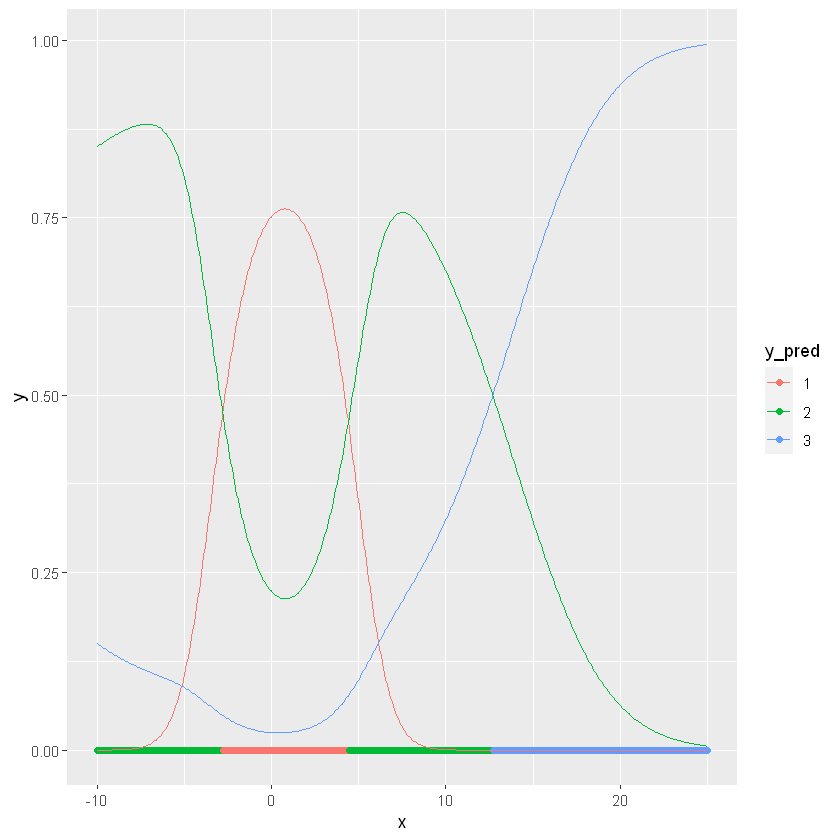

In [67]:
ggplot(data=mdf,mapping=aes(x=x,y=0,color=y_pred,group=y_pred))+
    geom_point()+
    geom_line(mapping=aes(x=x,y=value,group=variable,color=variable),inherit.aes=FALSE)
    geom_line(mapping=aes(x=x,y=value,group=variable,color=variable),inherit.aes=FALSE,data=mmod_df)

In [68]:
delta_qda_c2 = function(x0,class){
    subd = d[d$group==class,]
    muhat = mean(subd$x)
    pi_hat = mean(d$group==class)
    var_hat = var(subd$x)
    dlta = -1/2*log(var_hat) - 
        (x0-muhat)^2/(2*var_hat) +log(pi_hat)
    return(dlta)
}
qda_pred2 = function(x0){
    deltas = sapply(1:3,function(c)delta_qda_c2(x0,c))
    return(which.max(deltas))
}

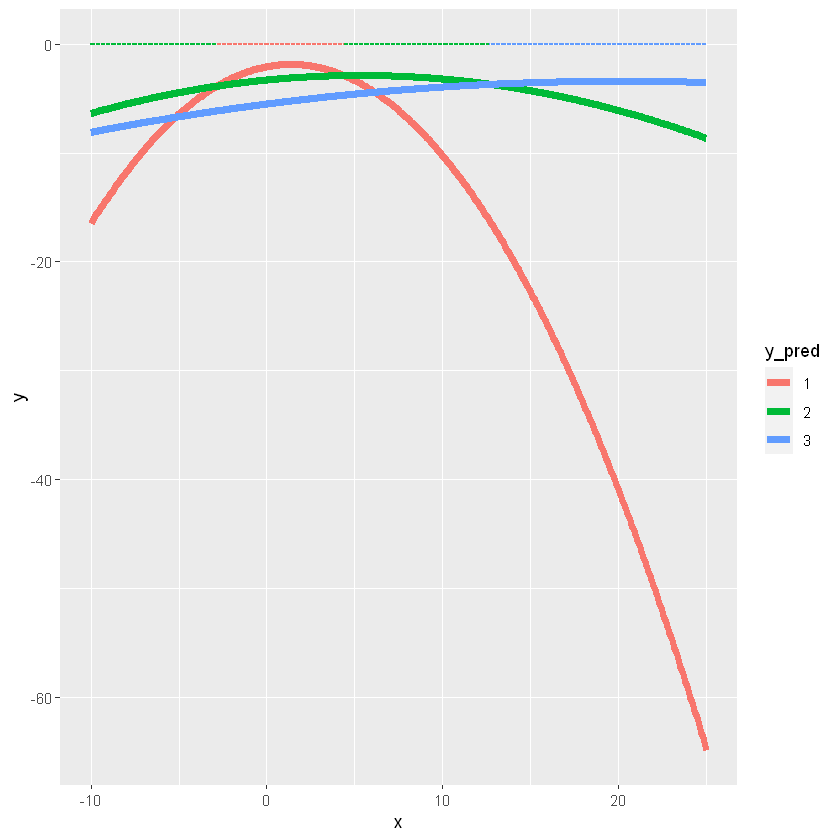

In [69]:
df = data.frame(x=x_seq,y_pred = sapply(x_seq,qda_pred2))
df$y_pred = factor(df$y_pred)
df$c1 = sapply(x_seq,delta_qda_c2,class=1)
df$c2 = sapply(x_seq,delta_qda_c2,class=2)
df$c3 = sapply(x_seq,delta_qda_c2,class=3)

mdf = melt(df,id.vars=c('x','y_pred'))
levels(mdf$variable) = c(1,2,3)

ggplot(data=mdf,mapping=aes(x=x,y=0,color=y_pred,group=y_pred))+
    geom_point(shape=1,size=1/10)+
    geom_line(mapping=aes(x=x,y=value,group=variable,color=variable),lwd=2)

# for $p>1$

In [74]:
library('palmerpenguins')
penguins = penguins[complete.cases(penguins),]
head(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007
Adelie,Torgersen,38.9,17.8,181,3625,female,2007


In [75]:
d = penguins[,c('bill_length_mm','bill_depth_mm','species')]
head(d)

bill_length_mm,bill_depth_mm,species
<dbl>,<dbl>,<fct>
39.1,18.7,Adelie
39.5,17.4,Adelie
40.3,18.0,Adelie
36.7,19.3,Adelie
39.3,20.6,Adelie
38.9,17.8,Adelie


In [77]:
plot_fit = function(v1,v2,df=penguins,N=floor(sqrt(10000)),scaleit=FALSE,fmla='species~.'){
    train_df = df[,c('species',v1,v2)]
    if(scaleit)
        train_df[,c(v1,v2)] = scale(train_df[,c(v1,v2)])
    
    #mod = knn3(species~.,data=train_df,k=k)
    #mod = lda(formula=as.formula(fmla),data=train_df)
    mod = qda(formula=as.formula(fmla),data=train_df)
    
    r1 = range(train_df[[v1]])
    r2 = range(train_df[[v2]])
    
    s1 = seq(r1[1],r1[2],length.out=N)
    s2 = seq(r2[1],r2[2],length.out=N)
    
    p_df = expand.grid(v1=s1,v2=s2)
    colnames(p_df) = c(v1,v2)
    preds = predict(mod,newdata=p_df)$class
    p_df$species = preds
    
    ggplot(data=p_df,mapping=aes_string(x=v1,y=v2,fill='species',shape='species'))+geom_tile()+
        geom_point(data=train_df,size=5)
}

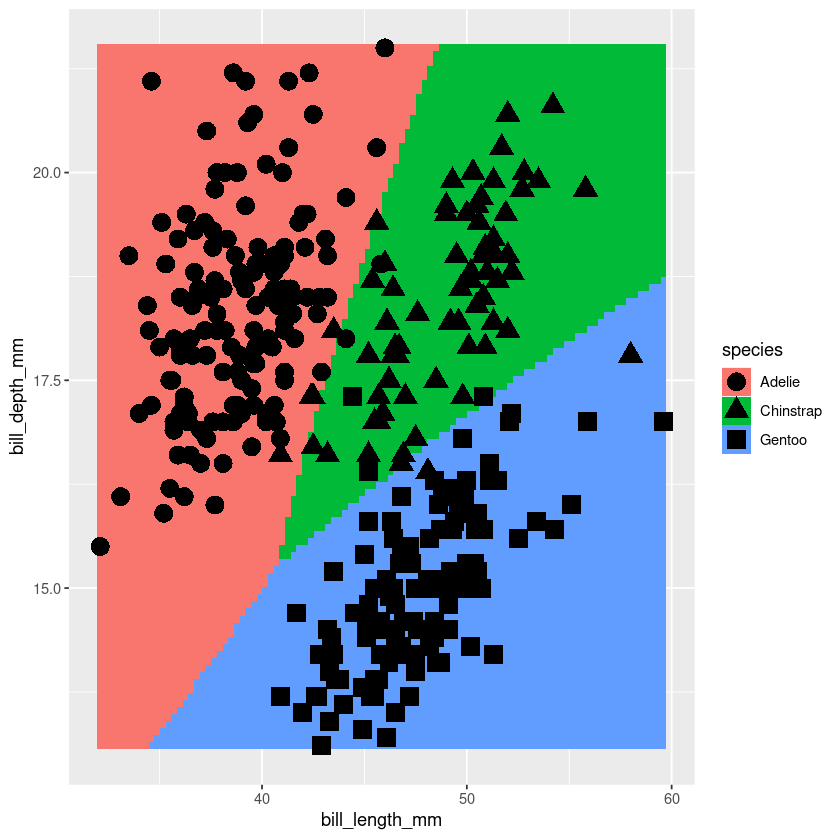

In [78]:
plot_fit(v1='bill_length_mm',v2='bill_depth_mm',df=penguins)

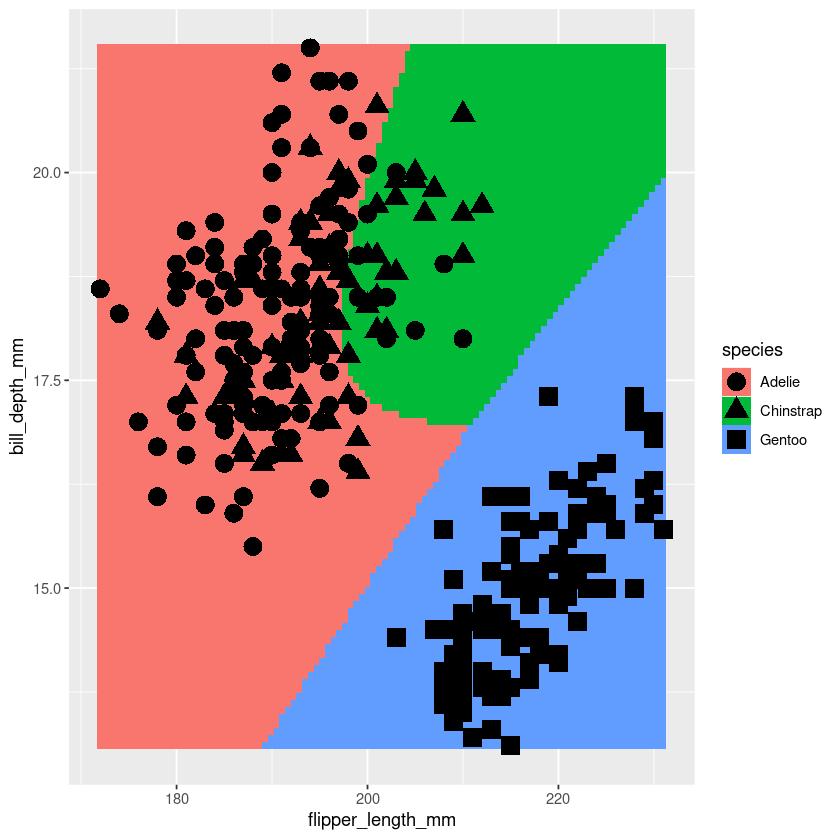

In [79]:
plot_fit(v1='flipper_length_mm',v2='bill_depth_mm',df=penguins)

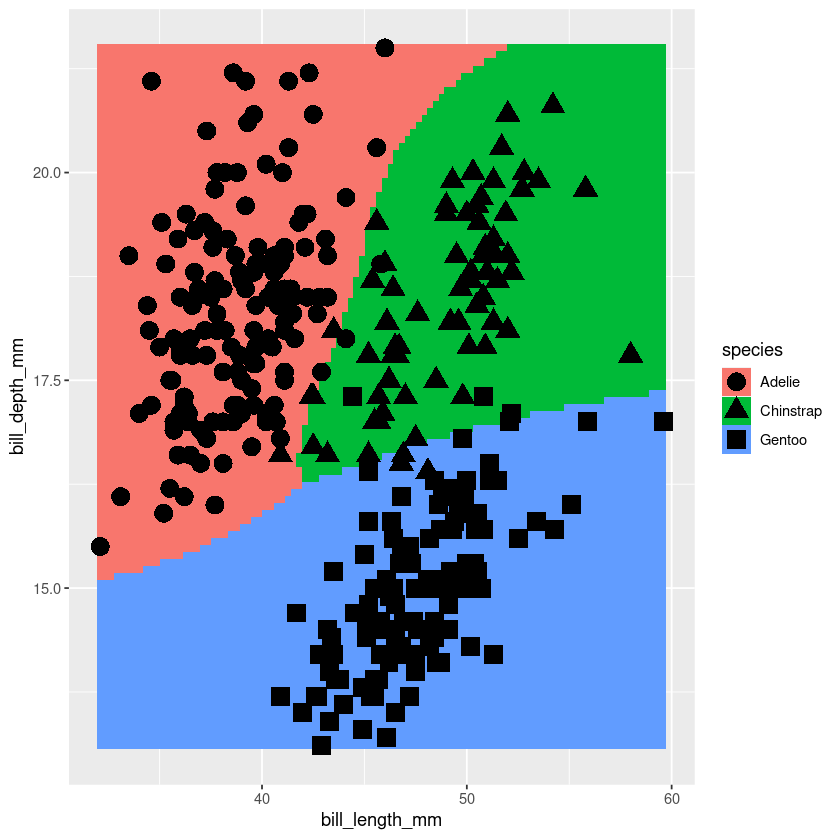

In [95]:
plot_fit(v1='bill_length_mm',v2='bill_depth_mm',df=penguins,
             fmla='species~I(bill_length_mm^2)+I(bill_depth_mm^3)+I(bill_depth_mm^2)')

intercept?

In [102]:
head(model.matrix(mod))

,(Intercept),bill_length_mm,bill_depth_mm
1,1,39.1,18.7
2,1,39.5,17.4
3,1,40.3,18.0
4,1,36.7,19.3
5,1,39.3,20.6
6,1,38.9,17.8


[source code for lda](https://github.com/cran/MASS/blob/master/R/lda.R) see line 29